In [10]:
import collections
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors


In [11]:
reviews_tv_shows_df = pd.read_csv('./reviews_tv_shows.csv')
reviews_tv_shows_df

,Unnamed: 0,tv_show,16,18,35,37,80,878,9648,10751,...,10762,10763,10764,10765,10766,10767,10768,user,rating,id_y
0,0,Invincible,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,ChrisSawin,10.000000,6058917c5c071b00546ccab3
1,1,The Flash,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,Tanasia,5.195675,5f98b89877e1f600358ada9f
2,2,The Flash,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,BruhDev,5.195675,605e5e40d2f5b500286aa8ed
3,3,The Good Doctor,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,drtvnut89,10.000000,5a0a07c192514131210073ec
4,4,The Handmaid's Tale,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,Rangan,5.195675,59bd8f6b92514135510185ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7562,7562,Absentia,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,larz9,10.000000,5b1406c3c3a368628e01ba6d
7563,7563,Quantico,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,suspectedowl,10.000000,5a04c360c3a36833cf006629
7564,7564,Given,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ausher8,8.000000,5fbb8ace8d22fc003e7d242b
7565,7565,The Haunting of Hill House,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,Splinter,4.000000,5bce80090e0a266242003202


In [12]:
users_df = pd.pivot_table(reviews_tv_shows_df, values='rating', index='user', columns='tv_show')
users_df

tv_show,13 Reasons Why,3Below: Tales of Arcadia,A Discovery of Witches,A Million Little Things,AIBOU: Tokyo Detective Duo,Absentia,Agries Melisses,Akame ga Kill!,Alexa & Katie,All American,...,Westworld,What We Do in the Shadows,White Collar,Wizards: Tales of Arcadia,Wynonna Earp,Xena: Warrior Princess,YOU,Your Lie in April,iCarly,iZombie
user,,,,,,,,,,,,,,,,,,,,,
AKJETJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
Abro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdamRife,4.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
Aditya@13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
Ahstaroth,2.0,NaN,NaN,9.0,NaN,3.0,NaN,NaN,NaN,NaN,...,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tmdbsom,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,...,NaN,NaN,NaN,NaN,9.0,NaN,10.0,10.0,10.0,NaN
tomk1,10.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,10.0,NaN,2.0,NaN,NaN,NaN
wan_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_columns = users_df.columns

for i in range(0,242):
    s = users_df[df_columns[i]].value_counts(normalize=True)
    missing = users_df[df_columns[i]].isnull()
    
    users_df.loc[missing,df_columns[i]] = np.random.choice(s.index, size=len(users_df[missing]),p=s.values)
users_df

tv_show,13 Reasons Why,3Below: Tales of Arcadia,A Discovery of Witches,A Million Little Things,AIBOU: Tokyo Detective Duo,Absentia,Agries Melisses,Akame ga Kill!,Alexa & Katie,All American,...,Westworld,What We Do in the Shadows,White Collar,Wizards: Tales of Arcadia,Wynonna Earp,Xena: Warrior Princess,YOU,Your Lie in April,iCarly,iZombie
user,,,,,,,,,,,,,,,,,,,,,
AKJETJ,2.000000,5.0,3.0,6.0,9.0,6.0,5.0,5.0,6.0,1.0,...,2.000000,10.0,3.0,6.0,10.000000,10.0,10.0,10.0,9.0,1.0
Abro,0.000000,10.0,3.0,3.0,10.0,1.0,5.0,9.0,1.0,3.0,...,5.195675,4.0,6.0,1.0,7.000000,8.0,8.0,10.0,6.0,2.0
AdamRife,4.000000,3.0,0.0,7.0,4.0,10.0,8.0,5.0,8.0,8.0,...,10.000000,4.0,8.0,10.0,7.000000,9.0,8.0,9.0,9.0,4.0
Aditya@13,0.000000,4.0,3.0,6.0,3.0,0.0,2.0,8.0,8.0,10.0,...,4.000000,4.0,2.0,1.0,10.000000,9.0,7.0,0.0,4.0,5.0
Ahstaroth,2.000000,1.0,5.0,9.0,10.0,3.0,2.0,5.0,7.0,4.0,...,5.000000,0.0,10.0,4.0,5.195675,6.0,6.0,5.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tmdbsom,6.000000,3.0,6.0,6.0,4.0,4.0,0.0,0.0,4.0,1.0,...,7.000000,9.0,10.0,7.0,9.000000,7.0,10.0,10.0,10.0,2.0
tomk1,10.000000,1.0,3.0,4.0,0.0,2.0,9.0,9.0,5.0,5.0,...,8.000000,7.0,1.0,1.0,10.000000,8.0,2.0,0.0,10.0,4.0
wan_,5.195675,5.0,6.0,5.0,4.0,4.0,0.0,5.0,7.0,3.0,...,8.000000,7.0,1.0,6.0,10.000000,1.0,3.0,10.0,9.0,7.0


In [14]:
users_df.isnull().sum()

tv_show
13 Reasons Why                0
3Below: Tales of Arcadia      0
A Discovery of Witches        0
A Million Little Things       0
AIBOU: Tokyo Detective Duo    0
                             ..
Xena: Warrior Princess        0
YOU                           0
Your Lie in April             0
iCarly                        0
iZombie                       0
Length: 242, dtype: int64

##DBSCAN
Visando avaliar outros modelos e técnicas, foi feito um teste com os mesmos dados para o método DBSCAN (Density-based spatial clustering of applications with noise). Como o nome sugere, o método é baseado na densidade e evidencia outliers dos clusters, o que faz sentido para o caso da aplicação da Stream.it, em que a menor distância entre os usuários pode indicar recomendações mais adequadas e direcionadas.

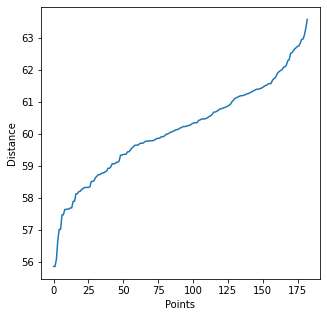

In [15]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(users_df)

distances, indices = neighbors.kneighbors(users_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

In [17]:
dbscan_model = DBSCAN(eps=62,min_samples=5).fit(users_df)
db_clusters = dbscan_model.labels_
db_clusters

array([ 0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0])

##Resultados
A implementação do modelo não obteve bons resultados, provavelmente devido ao conjunto de entrada de dados não possuir formato adequado para a técnica. Na imagem abaixo temos o array com o resultado das predições, podemos ver que não houve distribuição em clusters, estados todos concentrados no 0 ou em -1 (nenhum).

In [ ]:
df_columns = users_df.columns

for i in range(0,242):
    s = users_df[df_columns[i]].value_counts(normalize=True)
    missing = users_df[df_columns[i]].isnull()
    
    users_df.loc[missing,df_columns[i]] = np.random.choice(s.index, size=len(users_df[missing]),p=s.values)
users_df

In [72]:
!pip install scikit-surprise

You should consider upgrading via the '/Users/antonioalmeidab/Code/ml-school/.env/bin/python3.9 -m pip install --upgrade pip' command.


Na análise de outras abordagens ao problema da recomendação, foi decidido realizar testes com o kNN e SVD, ambos visando fazer a recomendação ou não de uma série individualmente, através da predição da nota que um usuário concederia a ela, baseado no seu histórico de avaliações. 

Para essa foi utilizado o dataset das avaliações, para o qual novas linhas foram geradas aleatoriamente na fase inicial, a de coleta dos dados.

In [73]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import SVD, KNNBasic
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [74]:
reviews_tv_df = pd.read_csv('reviews_tv_shows.csv')
reviews_tv_df =  reviews_tv_df.drop(['id_y', 'Unnamed: 0'], axis=1)

labelencoder = LabelEncoder()
reviews_tv_df['tv_show'] = labelencoder.fit_transform(reviews_tv_df['tv_show'])
reviews_tv_df['user'] = labelencoder.fit_transform(reviews_tv_df['user'])
reviews_tv_df

,tv_show,16,18,35,37,80,878,9648,10751,10759,10762,10763,10764,10765,10766,10767,10768,user,rating
0,86,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,15,10.000000
1,173,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,78,5.195675
2,173,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,5.195675
3,176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,10.000000
4,180,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,62,5.195675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7562,5,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,132,10.000000
7563,131,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,166,10.000000
7564,74,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,8.000000
7565,181,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,68,4.000000


In [75]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(reviews_tv_df[['user', 'tv_show', 'rating']], reader)



In [96]:
param_grid = {'k': [57, 60, 65, 71],
              'min_k': [1, 2, 5, 9, 17, 30]}
gridsearch_KNN = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=7)
gridsearch_KNN.fit(data)

print('Best Score: ' + str(gridsearch_KNN.best_score['rmse']))
print('Best Params: ' + str(gridsearch_KNN.best_params['rmse']))
print(gridsearch_KNN.cv_results)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [77]:
knn_model = KNNBasic(**gridsearch_KNN.best_params['rmse'])
knn_model.fit(data.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [78]:
param_grid = {'n_epochs': [20, 25, 30, 50, 60],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.04, 0.06]}

gridsearch_SVD = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)

gridsearch_SVD.fit(data)

print("Best Score:" + str(gridsearch_SVD.best_score['rmse']))
print("Best Params:" + str(gridsearch_SVD.best_params['rmse']))


Best Score:3.204792496692817
Best Params:{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.04}


In [79]:
svd_model = SVD(**gridsearch_SVD.best_params['rmse'])
svd_model.fit(data.build_full_trainset())

print(svd_model.predict(uid=20, iid=100).est)
print(svd_model.predict(uid=25, iid=80).est)
print(svd_model.predict(uid=15, iid=86).est)

5.926930402523384
5.200250676102917
5.34654630208286


In [80]:
print(svd_model.predict(uid=86, iid=15).est)


6.601898601373762


In [81]:
results_SVD = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
results_KNN = cross_validate(knn_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.2431  3.1511  3.1816  3.1648  3.2175  3.1916  0.0340  
MAE (testset)     2.8020  2.7193  2.7193  2.7223  2.7815  2.7489  0.0356  
Fit time          0.68    0.59    0.47    0.47    0.62    0.57    0.08    
Test time         0.13    0.01    0.02    0.01    0.06    0.05    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.2013  3.1668  3.1504  3.1877  3.2236  3.1859  0.0256

In [82]:
compare_models = {
    'SVD': {'RMSE': results_SVD['test_rmse'][-1],'MAE': results_SVD['test_mae'][-1]},
    'KNNBasic': {'RMSE': results_KNN['test_rmse'][-1],'MAE': results_KNN['test_mae'][-1]}
}
compare_models

{'SVD': {'RMSE': 3.217470415543223, 'MAE': 2.7814919319693963},
 'KNNBasic': {'RMSE': 3.2235863182650353, 'MAE': 2.756514404380967}}

Apesar das sucessivas variações dos parâmetros, em ambos os casos o erro não foi satisfatoriamente baixo, além disso, alguns breves testes de predição com casos conhecidos obtiveram resultados muito distoantes. Portanto, foi optado por se manter utilizando o clustering com KMeans, que foi o primeiro método escolhido para o projeto e inicialmente teve um bom resultado e satisfatório para a finalidade de recomendação a "aproximação" dos usuários semelhantes.